In [2]:
import deeplabcut
import tensorflow as tf
import tensorrt as trt

print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.sysconfig.get_build_info()["cuda_version"])
print("cuDNN version:", tf.sysconfig.get_build_info()["cudnn_version"])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("tensorrt version:", trt.__version__)

TensorFlow version: 2.12.0
CUDA version: 11.8
cuDNN version: 8
Num GPUs Available:  1
tensorrt version: 10.0.1


2024-07-10 12:55:21.599889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 12:55:21.634308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 12:55:21.634339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# only using experiment ONE to see how strongly it generalizes
deeplabcut.create_new_project('Moused_4', 'David', ['/home/box/coding/CTIR/videos/experiment_1/E1_front.avi', '/home/box/coding/CTIR/videos/experiment_1/E1_side.avi', '/home/box/coding/CTIR/videos/experiment_1/E1_top.avi',
                                                '/home/box/coding/CTIR/videos/experiment_2/E2_front.avi','/home/box/coding/CTIR/videos/experiment_2/E2_side.avi','/home/box/coding/CTIR/videos/experiment_2/E2_top.avi'])

Created "/home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/videos"
Created "/home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/labeled-data"
Created "/home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/training-datasets"
Created "/home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_front.avi to /home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/videos/E1_front.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_side.avi to /home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/videos/E1_side.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_top.avi to /home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/videos/E1_top.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_2/E2_front.avi to /home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/videos/E2_front.avi
Created the symlink

'/home/box/coding/CTIR/Step_1/Moused_4-David-2024-07-10/config.yaml'

In [ ]:
config_path = '/home/box/coding/CTIR/Moused_2-David-2024-07-05/config.yaml'

In [3]:
config_path = '/home/box/coding/CTIR/Moused_4-David-2024-07-10/config.yaml'


In [ ]:
deeplabcut.extract_frames(config_path, algo='uniform', userfeedback=False)

In [8]:
deeplabcut.convertcsv2h5('/home/box/coding/CTIR/Moused_4-David-2024-07-10/config.yaml', scorer= 'David')

Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_4-David-2024-07-10/labeled-data/E1_front ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_4-David-2024-07-10/labeled-data/E1_side ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_4-David-2024-07-10/labeled-data/E1_top ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_4-David-2024-07-10/labeled-data/E2_front ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_4-David-2024-07-10/labeled-data/E2_side ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_4-David-2024-07-10/labeled-data/E2_top ?


In [ ]:
deeplabcut.label_frames(config_path)

In [9]:
deeplabcut.check_labels(config_path)

Creating images with labels by David.


100%|██████████| 33/33 [00:03<00:00,  8.65it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [4]:
# There are many more functions you can set here, including which network to use. Check the docstring for full options you can do!
deeplabcut.create_training_dataset(config_path, num_shuffles=1, net_type='resnet_101', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.9,
  1,
  (array([ 96, 202, 169, 136, 182, 150,  44, 197,  64,   8, 107,  37,   5,
          145,  63, 184, 139, 205, 219,  90, 110,  74, 125,  75, 155,  12,
          158, 160, 124, 135,  55, 104, 156, 171,  18,  15,  92,   7,  76,
          162,  97, 143, 152, 106, 200,  33, 144, 217, 199, 138, 116, 188,
          194,  16, 123, 109, 210,  22, 204,  45,  71,   4,  83, 186,  61,
           52,  66,  26, 166,  40,  13, 122,  89,  24,  30,  60,  56, 161,
          101,  19, 168, 176,  54, 180,  80,  51, 108, 154, 118,  86, 178,
          126, 159, 111,  41,  14,  27, 141, 201,  20, 149,  46, 153, 218,
          130, 157,  62, 146,   2,  59, 137, 207,  43,  10, 129,  73, 213,
          216, 112, 198, 189,  98,   3,  93, 134, 203, 212,  50, 113,   0,
           94,  95,  69,  49,  48,  85, 220,  23,  78, 100, 131, 181, 221,
            6,  68,  84, 121, 208, 170, 190, 185, 222,  91, 191,  11, 119,
          102,  35,  57,  65,   1, 120, 179,  42, 105, 132, 206,  17,  38,
          133

In [13]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


2024-07-10 12:52:14.117585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 12:52:14.117667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 12:52:14.117692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 12:52:14.117946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 12:52:14.117960: I tensorflow/core/co

In [ ]:
trainposeconfigfile

In [15]:
import deeplabcut
config_path = '/home/box/coding/CTIR/Moused_4-David-2024-07-10/config.yaml'
shuffle = 1
trainingsetindex = 0

trainposeconfigfile, testposeconfigfile, snapshotfolder = deeplabcut.return_train_network_path(config_path, shuffle=shuffle, trainingsetindex=trainingsetindex)

cfg_dlc = deeplabcut.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)

# Updating configuration parameters
cfg_dlc['scale_jitter_lo'] = 0.7
cfg_dlc['scale_jitter_up'] = 1.5
cfg_dlc['augmentationprobability'] = 0.7
cfg_dlc['batch_size'] = 2  # Adjust batch size based on your GPU memory
cfg_dlc['elastic_transform'] = True
cfg_dlc['rotation'] = 180
cfg_dlc['covering'] = True
cfg_dlc['motion_blur'] = True
cfg_dlc['optimizer'] = "adam"
cfg_dlc['dataset_type'] = 'imgaug'
cfg_dlc['lr_init'] = 0.0001  # Adjust this value if needed

cfg_dlc['display_iters'] = 100
cfg_dlc['save_iters'] = 2000
cfg_dlc['max_iters'] = 100000

cfg_dlc['multi_step'] = [[0.0001, 5000], [0.0005, 10000]]

# Remove conflicting multi_step configuration

deeplabcut.auxiliaryfunctions.write_plainconfig(trainposeconfigfile, cfg_dlc)

deeplabcut.train_network(config_path, shuffle=shuffle, trainingsetindex=trainingsetindex)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20]],
 'all_joints_names': ['nose',
                      'eye_left',
                      'eye_right',
                      'ear_left',
                      'ear_right',
                      'front_paw_left',
                      'front_paw_right',
                      'body_center',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door',
                      'sliding_door_to

Selecting single-animal trainer
Batch Size is 2
Loading ImageNet-pretrained resnet_101


2024-07-10 13:15:59.252415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:15:59.252519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:15:59.252534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:15:59.253006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:15:59.253048: I tensorflow/core/co

Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/box/coding/CTIR/Moused_4-David-2024-07-10/dlc-models/iteration-0/Moused_4Jul10-trainset90shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'adam', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 2, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]], 'all_joints_na

iteration: 100 loss: 0.0670 lr: 0.0001
iteration: 200 loss: 0.0302 lr: 0.0001
iteration: 300 loss: 0.0258 lr: 0.0001
iteration: 400 loss: 0.0229 lr: 0.0001
iteration: 500 loss: 0.0207 lr: 0.0001
iteration: 600 loss: 0.0209 lr: 0.0001
iteration: 700 loss: 0.0186 lr: 0.0001
iteration: 800 loss: 0.0176 lr: 0.0001
iteration: 900 loss: 0.0171 lr: 0.0001
iteration: 1000 loss: 0.0161 lr: 0.0001
iteration: 1100 loss: 0.0155 lr: 0.0001
iteration: 1200 loss: 0.0151 lr: 0.0001
iteration: 1300 loss: 0.0140 lr: 0.0001
iteration: 1400 loss: 0.0138 lr: 0.0001
iteration: 1500 loss: 0.0136 lr: 0.0001
iteration: 1600 loss: 0.0134 lr: 0.0001
iteration: 1700 loss: 0.0127 lr: 0.0001
iteration: 1800 loss: 0.0120 lr: 0.0001
iteration: 1900 loss: 0.0126 lr: 0.0001
iteration: 2000 loss: 0.0125 lr: 0.0001
iteration: 2100 loss: 0.0119 lr: 0.0001
iteration: 2200 loss: 0.0116 lr: 0.0001
iteration: 2300 loss: 0.0115 lr: 0.0001
iteration: 2400 loss: 0.0124 lr: 0.0001
iteration: 2500 loss: 0.0107 lr: 0.0001
iteration

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20]],
 'all_joints_names': ['nose',
                      'eye_left',
                      'eye_right',
                      'ear_left',
                      'ear_right',
                      'front_paw_left',
                      'front_paw_right',
                      'body_center',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door',
                      'sliding_door_to

Running  DLC_resnet101_Moused_4Jul10shuffle1_10000  with # of training iterations: 10000


2024-07-10 13:41:07.248495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:41:07.248576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:41:07.248590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:41:07.248903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:41:07.248932: I tensorflow/core/co

Running evaluation ...


223it [00:08, 26.13it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10000
Results for 10000  training iterations: 90 1 train error: 16.48 pixels. Test error: 25.66  pixels.
With pcutoff of 0.6  train error: 6.29 pixels. Test error: 10.61 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 223/223 [00:49<00:00,  4.50it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


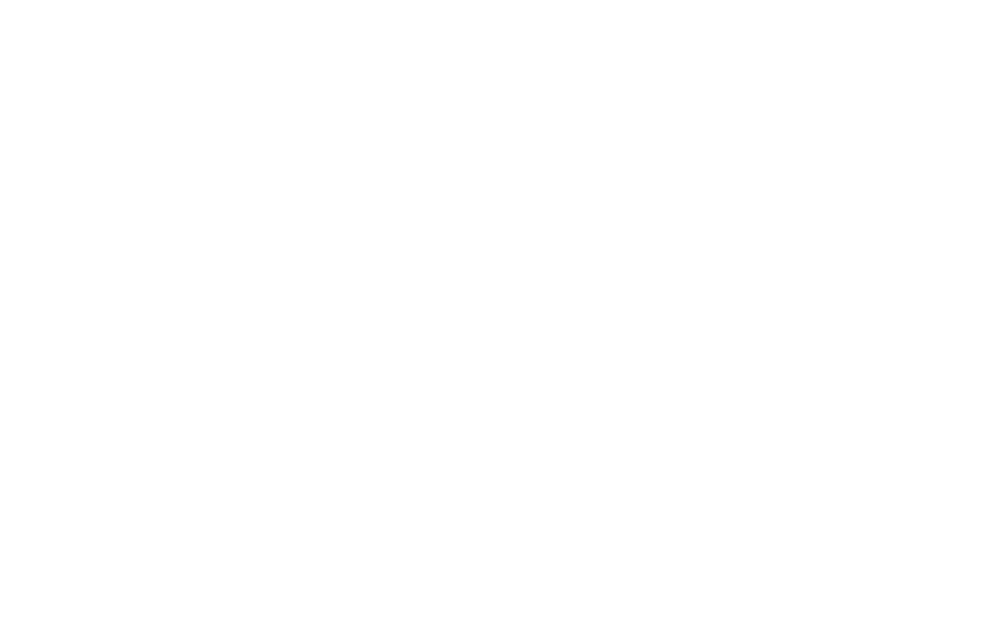

In [16]:
deeplabcut.evaluate_network(config_path,plotting=True)

In [17]:
video_path = '/home/box/coding/CTIR/videos/experiment_1/E1_top.avi'
video_paths = ['/home/box/coding/CTIR/videos/experiment_1/E1_side.avi','/home/box/coding/CTIR/videos/experiment_1/E1_front.avi','/home/box/coding/CTIR/videos/experiment_1/E1_top.avi',
               '/home/box/coding/CTIR/videos/experiment_2/E2_side.avi','/home/box/coding/CTIR/videos/experiment_2/E2_front.avi','/home/box/coding/CTIR/videos/experiment_2/E2_top.avi']

In [18]:
deeplabcut.analyze_videos(config_path,video_paths)
deeplabcut.create_labeled_video(config_path,video_paths)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20]],
 'all_joints_names': ['nose',
                      'eye_left',
                      'eye_right',
                      'ear_left',
                      'ear_right',
                      'front_paw_left',
                      'front_paw_right',
                      'body_center',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door',
                      'sliding_door_to

Using snapshot-10000 for model /home/box/coding/CTIR/Moused_4-David-2024-07-10/dlc-models/iteration-0/Moused_4Jul10-trainset90shuffle1


2024-07-10 13:42:10.071384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:42:10.071461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:42:10.071474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:42:10.071803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-10 13:42:10.071863: I tensorflow/core/co

Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_side.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_side.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [04:03<00:00, 68.52it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_1...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [04:01<00:00, 68.84it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_1...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_top.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_top.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [04:05<00:00, 67.80it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_1...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_2/E2_side.avi
Loading  /home/box/coding/CTIR/videos/experiment_2/E2_side.avi
Duration of video [s]:  645.0 , recorded with  30.0 fps!
Overall # of frames:  19350  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 19350/19350 [04:41<00:00, 68.64it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_2...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_2/E2_front.avi
Loading  /home/box/coding/CTIR/videos/experiment_2/E2_front.avi
Duration of video [s]:  645.0 , recorded with  30.0 fps!
Overall # of frames:  19350  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 19350/19350 [04:39<00:00, 69.13it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_2...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_2/E2_top.avi
Loading  /home/box/coding/CTIR/videos/experiment_2/E2_top.avi
Duration of video [s]:  645.0 , recorded with  30.0 fps!
Overall # of frames:  19350  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 19350/19350 [04:39<00:00, 69.16it/s]

Saving results in /home/box/coding/CTIR/videos/experiment_2...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


Starting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_front.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_top.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_side.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_2/E2_side.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_2/E2_front.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_2/E2_top.avi





Loading /home/box/coding/CTIR/videos/experiment_1/E1_top.avi and data.Loading /home/box/coding/CTIR/videos/experiment_1/E1_front.avi and data.Loading /home/box/coding/CTIR/videos/experiment_2/E2_front.avi and data.Loading /home/box/coding/CTIR/videos/experiment_2/E2_side.avi and data.Loading /home/box/coding/CTIR/videos/experiment_2/E2_top.avi and data.
Loading /home/box/coding/CTIR/videos/experiment_1/E1_side.avi and data.




Duration of video [s]: 555.0, recorded with 30.0 fps!Duration of video [s]: 645.0,

  0%|          | 0/16650 [00:00<?, ?it/s]



Overall # of frames: 19350 with cropped frame dimensions: 968 608Overall # of frames: 16650 with cropped frame dimensions: 968 608Overall # of frames: 16650 with cropped frame dimensions: 968 608

  0%|          | 0/19350 [00:00<?, ?it/s]




Generating frames and creating video.Generating frames and creating video.Generating frames and creating video.




  0%|          | 0/16650 [00:00<?, ?it/s]

Duration of video [s]: 645.0, recorded with 30.0 fps!
Overall # of frames: 19350 with cropped frame dimensions: 968 608
Generating frames and creating video.


100%|██████████| 19350/19350 [02:42<00:00, 119.03it/s]


[True, True, True, True, True, True]